# Stirling's Formula and a hypothesis test

We use Stirling's formula to approximate the probability of drawing $n$ red and $n$ blue balls from an urn with $2n$ red and $2n$ blue balls, assuming we draw $2n$ balls without replacement.

The percent error is quite small (less than 2%) even for modest values of $n$, like $n=10$. 

In [1]:
n = 100

truevalue = convert(Float64,binomial(big(2n),n)^2 / binomial(big(4n),2n))
approximation = 2/(sqrt(2π*n))

truevalue, approximation, 100*(approximation/truevalue-1)

(0.07963899366836436,0.07978845608028654,0.18767491280036186)

In [2]:
function b(n,p,k)
    # Computes (n choose k) * p^k * (1-p)^(n-k)
    result = 1.0
    for j = 0:k-1
        result *= (n-j)/((j+1))*p
    end
    result *= (1-p)^(n-k)
    return result
end

PowerCurve(n,p,m) = sum([b(n,p,k) for k=m:n])

PowerCurve (generic function with 1 method)

In [3]:
PowerCurve(100,0.6,68)

0.061503909592474384

In [4]:
using Gadfly

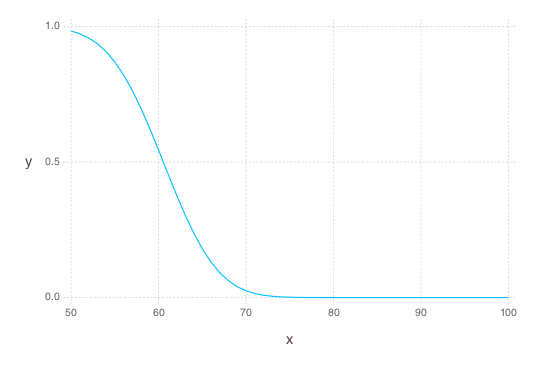

In [5]:
plot(x=[50:100],y=[PowerCurve(100,0.6,k) for k=50:100],Geom.line)